
0: 640x640 1 G, 123.1ms
Speed: 4.0ms preprocess, 123.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


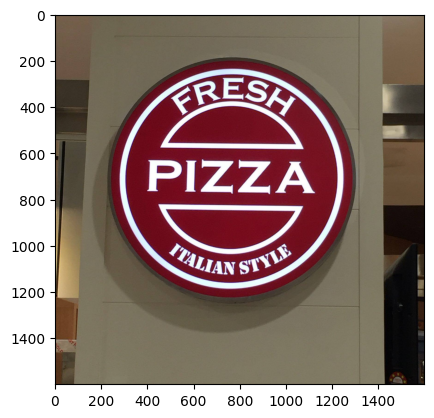

AttributeError: 'list' object has no attribute 'save'

In [8]:
# import cv2
# from matplotlib import pyplot as plt
# from ultralytics import YOLO

# # Load the model
# model = YOLO('C:\\Users\\ahmad\\OneDrive\\Desktop\\2023-2024-projectone-ctai-BigDracco\\Text-Vision-Pro-10\\best.pt')

# # Load an image
# img_path = 'C:\\Users\\ahmad\\OneDrive\\Desktop\\2023-2024-projectone-ctai-BigDracco\\Text-Vision-Pro-10\\Predictions\\img688.jpg'  # Specify the full path to the test image
# img = cv2.imread(img_path)

# # Convert the image from BGR to RGB (OpenCV loads images in BGR format)
# img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# # Make predictions
# results = model(img)

# # Display the results
# for result in results:
#     # Convert the result image from BGR to RGB if needed
#     result_img = cv2.cvtColor(result.orig_img, cv2.COLOR_BGR2RGB)
#     plt.imshow(result_img)
#     plt.show()

# # Save the results
# results.save('C:\\Users\\ahmad\\OneDrive\\Desktop\\2023-2024-projectone-ctai-BigDracco\\Text-Vision-Pro-10\\Result')


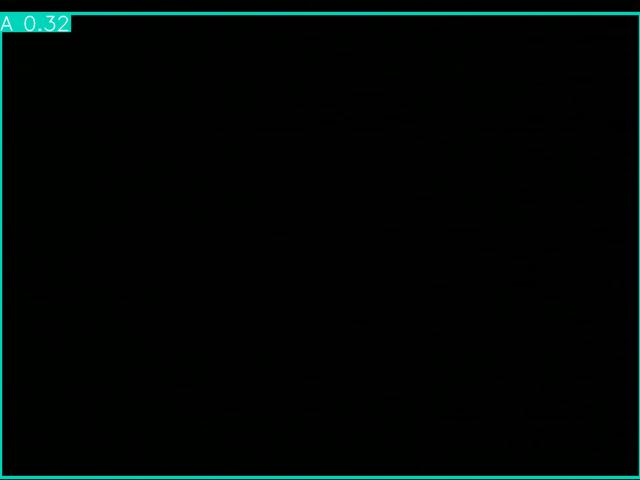

In [8]:
import cv2
from PIL import Image
from io import BytesIO
import IPython.display as display
from IPython.display import clear_output
from ultralytics import YOLO

# Load your model
model = YOLO("C:\\Users\\ahmad\\OneDrive\\Desktop\\2023-2024-projectone-ctai-BigDracco\\Text-Vision-Pro-10\\best.pt")

# Capture video from the camera
cap = cv2.VideoCapture(0)

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        # Make predictions
        results = model.predict(source=frame, agnostic_nms=True)

        # Get the result image with bounding boxes
        result_image = results[0].plot()
        
        # Convert the image to RGB format
        result_image_rgb = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)
        
        # Convert to PIL image for display in Jupyter
        pil_img = Image.fromarray(result_image_rgb)
        buf = BytesIO()
        pil_img.save(buf, format='JPEG')
        buf.seek(0)
        
        # Clear previous output and display the new image
        clear_output(wait=True)
        display.display(Image.open(buf))

except KeyboardInterrupt:
    pass


# Release the camera
cap.release()